                         標題    推文數
0            ◎ 沒有人該為自己的認同道歉  11245
1              ◎ 地震頻傳 請注意安全   5600
2           ◎ 季後賽首輪進行中 青賽出線   4907
3        ◎ Seed Freedom 上映中   3925
4        ◎ Baseball is life   3134
5            ◎ 拒絕划手機、度過沒電危機   1488
6            ◎ 沒有人該為自己的認同道歉   1220
7          ◎推薦碼板規已修改，推文前請注意   1054
8             ◎ 新板規於5/4正式施行   1023
9   ◎ 今日賽程FNCvsGAM/TESvsLLL   1010
10                  ◎ 房屋買賣版    778
11            ◎ 我是畜生，我跟毛怪作愛    588
12                 ◎ 這裡是科技板    578
13          ◎黃金周人擠人 多估時間不可少    456
14                        ◎    424
15           ◎ 禁政治版規延續 注意置底    408
16                ◎ 歡迎光臨婚姻板    406
17                  ◎ 今天有比賽    377
18           ◎ 貼AI圖 一律水桶+退文    365
19                        ◎    354
20                ◎ 記得打流感疫苗    339
21                        ◎    332
22            ◎理性討論軍事 請詳閱板規    325
23                 ◎ 今天是老大日    258
24        ◎請小心餘震注意安全<(@o@)/    249
25       ◎ ★:我家不賣A卡 (啊....)    245
26  ◎ 4/26 STELLAR BLADE 劍星    236
27       ◎AV女優板 清新、優

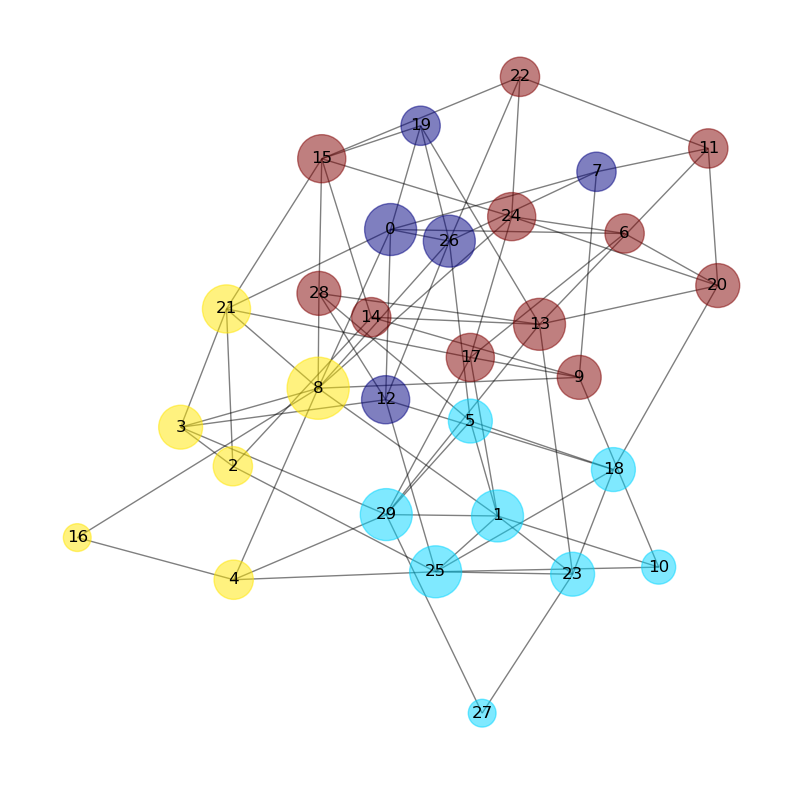

In [20]:
from requests_html import HTMLSession
import re
import pandas as pd
import jieba 
from collections import Counter


url = 'https://www.ptt.cc/bbs/hotboards.html'

# 建立 HTML 會話
session = HTMLSession()
response = session.get(url)

# 檢查是否成功取得網頁
if response.status_code == 200:
    # 使用 CSS 選擇器來提取標題、推文數和日期
    items = response.html.find('.b-ent')

    # 儲存清理後的資料的列表
    data = []

    # 計數器
    count = 0

    for item in items:
        title = item.find('.board-title', first=True).text
        nuser = item.find('.board-nuser .hl', first=True).text

        # 使用正則表達式清洗標題和推文數
        cleaned_title = re.sub(r'\[.*?\]', '', title).strip()  # 移除中括號及內容
        cleaned_nuser = re.sub(r'\s+', '', nuser)  # 移除所有空白

        # 將清理後的資料加入列表
        data.append({
            '標題': cleaned_title,
            '推文數': cleaned_nuser
        })

        # 每處理一次就將計數器加一
        count += 1

        # 如果計數器達到30，就跳出迴圈
        if count == 30:
            break

    # 將資料列表轉換成 DataFrame
    df = pd.DataFrame(data)
print(df)
import wandb
import pathlib
import textwrap
import google.generativeai as genai


from IPython.display import display
from IPython.display import Markdown

text = ' '.join(df['標題'])
# 使用jieba进行分词
words = jieba.cut(text)

# 统计词频
word_count = Counter(words)

# 获取出现频率最高的前10个关键字
top_keywords = word_count.most_common(10)
print(top_keywords)
#For formatting
def to_markdown(response):
    # 提取 content 中的文本部分
    content = response.result.candidates[0].content.parts[0].text
    
    # 將每行文本包裝在 Markdown 的引用符號中
    markdown_lines = [f"> {line.strip()}" for line in content.split('\n') if line.strip()]
    
    # 將每行包裝在段落中
    markdown_paragraphs = '\n\n'.join(markdown_lines)   
    return markdown_paragraphs
genai.configure(api_key="key")
query = text + "幫我統整這些資料內容，並告訴我該文字串中的重點內容"
model = genai.GenerativeModel('gemini-pro')
import markdown
import re
response = model.generate_content(query)
response = str(response)
start_index = response.find('[')
end_index = response.find(']')

# Extract the content within []
content_within_brackets = response[start_index:end_index + 1]

print(content_within_brackets)
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain
import numpy as np

# 创建一个示例网络图（假设G是一个NetworkX图对象）
# 这里的示例网络图是一个随机图
G = nx.erdos_renyi_graph(30, 0.15)

# 使用Louvain社区检测算法获取节点的社区分配
partition = community_louvain.best_partition(G)

# 根据节点的社区分配为节点着色
community_colors = [partition[node] for node in G.nodes()]

# 使用Jet colormap生成颜色，并为每个社区的颜色增加透明度
cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]
colors_with_alpha = [(r, g, b, 0.5) for r, g, b, _ in colors_with_alpha]

# 使用节点的度作为节点的大小
node_sizes = [200 * G.degree(node) for node in G.nodes()]

# 使用Spring layout算法确定节点的位置
pos = nx.spring_layout(G)

# 绘制网络图
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes)
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()


In [18]:
html_content = str(response)
clean_content = re.sub(r'<[^>]+>', '', html_content)

print(clean_content)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': '**重點內容：**\n\n* 個人認同不應受歧視\n* 注意地震安全\n* 季後賽進行中，青年隊出線\n* 電影「Seed Freedom」上映中\n* 無線電限制和新板規生效\n* 拒絕沉迷手機，應對沒電危機\n* 注意房屋買賣版規\n* 賽程預告：FNCvsGAM/TESvsLLL\n* AI圖文禁止發布\n* 流感疫苗接種提醒\n* 記得打流感疫苗\n* 餘震安全提醒\n* 軍事討論請遵守板規\n* 天氣狀況注意安全'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)


In [19]:
response = '''
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': '**重點內容：**\n\n* 個人認同不應受歧視\n* 注意地震安全\n* 季後賽進行中，青年隊出線\n* 電影「Seed Freedom」上映中\n* 無線電限制和新板規生效\n* 拒絕沉迷手機，應對沒電危機\n* 注意房屋買賣版規\n* 賽程預告：FNCvsGAM/TESvsLLL\n* AI圖文禁止發布\n* 流感疫苗接種提醒\n* 記得打流感疫苗\n* 餘震安全提醒\n* 軍事討論請遵守板規\n* 天氣狀況注意安全'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)'''

# Find the start and end indexes of the content within []
start_index = response.find('[')
end_index = response.find(']')

# Extract the content within []
content_within_brackets = response[start_index:end_index + 1]

print(content_within_brackets)


[{'content': {'parts': [{'text': '**重點內容：**

* 個人認同不應受歧視
* 注意地震安全
* 季後賽進行中，青年隊出線
* 電影「Seed Freedom」上映中
* 無線電限制和新板規生效
* 拒絕沉迷手機，應對沒電危機
* 注意房屋買賣版規
* 賽程預告：FNCvsGAM/TESvsLLL
* AI圖文禁止發布
* 流感疫苗接種提醒
* 記得打流感疫苗
* 餘震安全提醒
* 軍事討論請遵守板規
* 天氣狀況注意安全'}]
